In [1]:
path = '../data/fuel_type_data_california.parquet'

In [2]:
import pandas as pd

In [3]:
df_d = pd.read_parquet(path)
df_d

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2025-04-22 20:00:00-07:00,CAL,California,BAT,Battery storage,179,megawatthours
1,2025-04-22 20:00:00-07:00,CAL,California,COL,Coal,216,megawatthours
2,2025-04-22 20:00:00-07:00,CAL,California,GEO,Geothermal,457,megawatthours
3,2025-04-22 20:00:00-07:00,CAL,California,NG,Natural Gas,8601,megawatthours
4,2025-04-22 20:00:00-07:00,CAL,California,NUC,Nuclear,1134,megawatthours
...,...,...,...,...,...,...,...
452543,2018-12-31 17:00:00-07:00,CAL,California,OIL,Petroleum,88,megawatthours
452544,2018-12-31 17:00:00-07:00,CAL,California,OTH,Other,697,megawatthours
452545,2018-12-31 17:00:00-07:00,CAL,California,SUN,Solar,1595,megawatthours
452546,2018-12-31 17:00:00-07:00,CAL,California,WAT,Hydro,2880,megawatthours


In [4]:
df_d[['fueltype', 'type-name']].drop_duplicates().style

,fueltype,type-name
0,BAT,Battery storage
1,COL,Coal
2,GEO,Geothermal
3,NG,Natural Gas
4,NUC,Nuclear
5,OIL,Petroleum
6,OTH,Other
7,PS,Pumped storage
8,SNB,Solar with integrated battery storage
9,SUN,Solar


In [5]:
df = (df_d
.query('fueltype=="SUN"')
.set_index('period')['value'].to_frame()
.sort_index()
.loc['2019':'2024']
.resample('ME')
.sum()
)
df

,value
period,
2019-01-31 00:00:00-07:00,1533631
2019-02-28 00:00:00-07:00,1681819
2019-03-31 00:00:00-07:00,2463585
2019-04-30 00:00:00-07:00,2901632
2019-05-31 00:00:00-07:00,3036029
...,...
2024-08-31 00:00:00-07:00,5529172
2024-09-30 00:00:00-07:00,4935014
2024-10-31 00:00:00-07:00,4141628


In [6]:
df.columns = ['values']
df

,values
period,
2019-01-31 00:00:00-07:00,1533631
2019-02-28 00:00:00-07:00,1681819
2019-03-31 00:00:00-07:00,2463585
2019-04-30 00:00:00-07:00,2901632
2019-05-31 00:00:00-07:00,3036029
...,...
2024-08-31 00:00:00-07:00,5529172
2024-09-30 00:00:00-07:00,4935014
2024-10-31 00:00:00-07:00,4141628


In [7]:
series = df["values"]
series

period
2019-01-31 00:00:00-07:00    1533631
2019-02-28 00:00:00-07:00    1681819
2019-03-31 00:00:00-07:00    2463585
2019-04-30 00:00:00-07:00    2901632
2019-05-31 00:00:00-07:00    3036029
                              ...   
2024-08-31 00:00:00-07:00    5529172
2024-09-30 00:00:00-07:00    4935014
2024-10-31 00:00:00-07:00    4141628
2024-11-30 00:00:00-07:00    2952150
2024-12-31 00:00:00-07:00    2669105
Freq: ME, Name: values, Length: 72, dtype: int64

#### Individual component behaviour based on model

###### componenets:<br>Trend(T)<br>Seasonality(s)<br>Residual or Irregular Component(I)

###### Models:<br>Additive model:Yt = Tt+St+et<br>Multiplicative model: Yt = Tt*St*et 

In [8]:
import statsmodels.api as sm

In [9]:
sm.tsa.seasonal_decompose?

Signature:
sm.tsa.seasonal_decompose(
    x,
    model='additive',
    filt=None,
    period=None,
    two_sided=True,
    extrapolate_trend=0,
)
Docstring:
Seasonal decomposition using moving averages.

Parameters
----------
x : array_like
    Time series. If 2d, individual series are in columns. x must contain 2
    complete cycles.
model : {"additive", "multiplicative"}, optional
    Type of seasonal component. Abbreviations are accepted.
filt : array_like, optional
    The filter coefficients for filtering out the seasonal component.
    The concrete moving average method used in filtering is determined by
    two_sided.
period : int, optional
    Period of the series (e.g., 1 for annual, 4 for quarterly, etc). Must
    be used if x is not a pandas object or if the index of x does not have
    a frequency. Overrides default periodicity of x if x is a pandas
    object with a timeseries index.
two_sided : bool, optional
    The moving average method used in filtering.
    If True (d

#### Additive Model

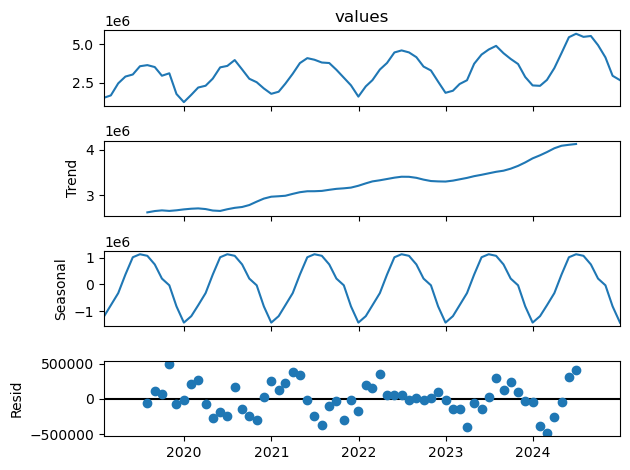

In [10]:
result = sm.tsa.seasonal_decompose(series,model='additive',period=12)
result.plot();

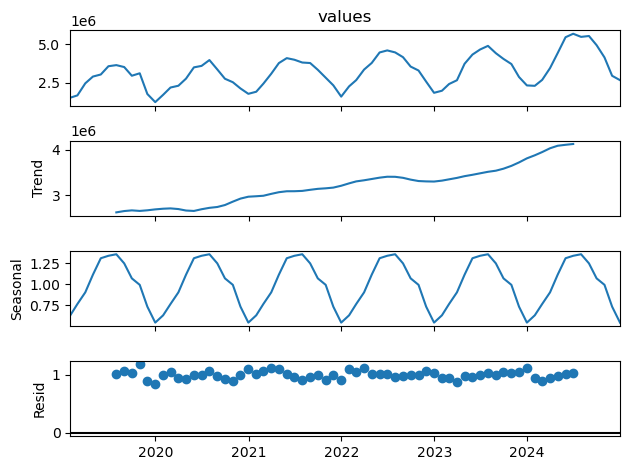

In [11]:
result = sm.tsa.seasonal_decompose(series,model='multiplicative',period=12)
result.plot();

#### Math calculation

##### Additive Model

In [12]:
result = sm.tsa.seasonal_decompose(series,model='additive',period=12)
result

In [13]:
r = (df
 .assign(
    trend = result.trend,
    seasonal = result.seasonal,
    residual = result.resid)
 .dropna())

r.head(10)

,values,trend,seasonal,residual
period,,,,
2019-07-31 00:00:00-07:00,3642935,2.627490e+06,1.079584e+06,-64138.611111
2019-08-31 00:00:00-07:00,3518060,2.656524e+06,7.548708e+05,106664.805556
2019-09-30 00:00:00-07:00,2955493,2.671304e+06,2.218577e+05,62330.847222
2019-10-31 00:00:00-07:00,3114174,2.659257e+06,-3.136406e+04,486281.063889
2019-11-30 00:00:00-07:00,1772165,2.672932e+06,-8.245175e+05,-76249.544444
2019-12-31 00:00:00-07:00,1246203,2.693040e+06,-1.436805e+06,-10032.319444
2020-01-31 00:00:00-07:00,1720159,2.707545e+06,-1.193623e+06,206237.097222
2020-02-29 00:00:00-07:00,2192122,2.714702e+06,-7.825423e+05,259962.388889
2020-03-31 00:00:00-07:00,2308003,2.700097e+06,-3.249668e+05,-67126.969444


In [14]:
r['model_result'] = r.trend + r.seasonal + r.residual
r.head(10)

,values,trend,seasonal,residual,model_result
period,,,,,
2019-07-31 00:00:00-07:00,3642935,2.627490e+06,1.079584e+06,-64138.611111,3642935.0
2019-08-31 00:00:00-07:00,3518060,2.656524e+06,7.548708e+05,106664.805556,3518060.0
2019-09-30 00:00:00-07:00,2955493,2.671304e+06,2.218577e+05,62330.847222,2955493.0
2019-10-31 00:00:00-07:00,3114174,2.659257e+06,-3.136406e+04,486281.063889,3114174.0
2019-11-30 00:00:00-07:00,1772165,2.672932e+06,-8.245175e+05,-76249.544444,1772165.0
2019-12-31 00:00:00-07:00,1246203,2.693040e+06,-1.436805e+06,-10032.319444,1246203.0
2020-01-31 00:00:00-07:00,1720159,2.707545e+06,-1.193623e+06,206237.097222,1720159.0
2020-02-29 00:00:00-07:00,2192122,2.714702e+06,-7.825423e+05,259962.388889,2192122.0
2020-03-31 00:00:00-07:00,2308003,2.700097e+06,-3.249668e+05,-67126.969444,2308003.0


In [15]:
dfs={}

In [16]:
dfs['additive']=r

#### Multiplicative model

In [17]:
result = sm.tsa.seasonal_decompose(series,model='multiplicative',period=12)


In [18]:
r = (df
 .assign(
    trend = result.trend,
    seasonal = result.seasonal,
    residual = result.resid)
 .dropna())
r.head(10)

,values,trend,seasonal,residual
period,,,,
2019-07-31 00:00:00-07:00,3642935,2.627490e+06,1.353946,1.024021
2019-08-31 00:00:00-07:00,3518060,2.656524e+06,1.246044,1.062811
2019-09-30 00:00:00-07:00,2955493,2.671304e+06,1.068914,1.035056
2019-10-31 00:00:00-07:00,3114174,2.659257e+06,0.992595,1.179806
2019-11-30 00:00:00-07:00,1772165,2.672932e+06,0.735015,0.902028
2019-12-31 00:00:00-07:00,1246203,2.693040e+06,0.546378,0.846940
2020-01-31 00:00:00-07:00,1720159,2.707545e+06,0.632452,1.004536
2020-02-29 00:00:00-07:00,2192122,2.714702e+06,0.766042,1.054120
2020-03-31 00:00:00-07:00,2308003,2.700097e+06,0.903809,0.945759


In [19]:
r['model_result'] = r.trend*r.seasonal*r.residual
r.head(10)

,values,trend,seasonal,residual,model_result
period,,,,,
2019-07-31 00:00:00-07:00,3642935,2.627490e+06,1.353946,1.024021,3642935.0
2019-08-31 00:00:00-07:00,3518060,2.656524e+06,1.246044,1.062811,3518060.0
2019-09-30 00:00:00-07:00,2955493,2.671304e+06,1.068914,1.035056,2955493.0
2019-10-31 00:00:00-07:00,3114174,2.659257e+06,0.992595,1.179806,3114174.0
2019-11-30 00:00:00-07:00,1772165,2.672932e+06,0.735015,0.902028,1772165.0
2019-12-31 00:00:00-07:00,1246203,2.693040e+06,0.546378,0.846940,1246203.0
2020-01-31 00:00:00-07:00,1720159,2.707545e+06,0.632452,1.004536,1720159.0
2020-02-29 00:00:00-07:00,2192122,2.714702e+06,0.766042,1.054120,2192122.0
2020-03-31 00:00:00-07:00,2308003,2.700097e+06,0.903809,0.945759,2308003.0


In [20]:

dfs['multiplicative'] = r

#### Visual comparison

In [21]:
df = pd.concat(dfs, axis=1).melt(ignore_index=False).reset_index()
df.columns = ["month","model","component","value"]

df

,month,model,component,value
0,2019-07-31 00:00:00-07:00,additive,values,3642935.0
1,2019-08-31 00:00:00-07:00,additive,values,3518060.0
2,2019-09-30 00:00:00-07:00,additive,values,2955493.0
3,2019-10-31 00:00:00-07:00,additive,values,3114174.0
4,2019-11-30 00:00:00-07:00,additive,values,1772165.0
...,...,...,...,...
595,2024-02-29 00:00:00-07:00,multiplicative,model_result,2685249.0
596,2024-03-31 00:00:00-07:00,multiplicative,model_result,3450581.0
597,2024-04-30 00:00:00-07:00,multiplicative,model_result,4421340.0
598,2024-05-31 00:00:00-07:00,multiplicative,model_result,5449656.0


In [22]:
df['component'].unique()

array(['values', 'trend', 'seasonal', 'residual', 'model_result'],
      dtype=object)

In [23]:
import plotly.express as px
fig = px.line(
    data_frame=df,
    x='month',
    y='value',
    color='component',
    facet_col='model',
    facet_row='component',
    width=1000,
    height=1000,
    facet_col_spacing=0.2
)
fig.update_yaxes(matches=None)

for attr in dir(fig.layout):
    if attr.startswith("yaxis"):
        axis = getattr(fig.layout, attr)
        if axis:
            axis.showticklabels=True
fig            

In [24]:
import sys
print(sys.executable)



c:\Users\basil\Anaconda\python.exe


In [32]:
import sys
sys.path.append('../modules')  # go up one folder, then into "modules"

import utils
utils.configure_plotly_template(showlegend=True)



In [31]:
import plotly.express as px

fig = px.line(
    data_frame=df,
    x='month',
    y='value',
    color='component',
    facet_col='model',
    facet_row='component',
    width=1000,
    height=500,
    facet_col_spacing=0.1,
)

fig.update_yaxes(matches=None)

for attr in dir(fig.layout):
    if attr.startswith("yaxis"):
        axis = getattr(fig.layout, attr)
        if axis:
            axis.showticklabels = True
        
fig